<a href="https://colab.research.google.com/github/Prava0712/IMDb-Movie-Review-Sentiment-Analysis/blob/main/Imdb_Movie_review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1:- Data Exploration and Preprocessing

In [2]:
import pandas as pd
import numpy as np
# Load the dataset (replace 'Imdb.csv' with your actual file name if different)
try:
    df = pd.read_csv('Imdb.csv', engine='python', on_bad_lines='skip')
except FileNotFoundError:
    print("Error: 'Imdb.csv' not found. Please check the file path.")
    # Create a dummy DataFrame for demonstration if the file is missing
    data = {'review': ["""This movie was truly fantastic and
inspiring!""", "Awful acting and a terrible, predictable plot.", """It was
just okay, neither good nor bad."""],
            'sentiment': ['positive', 'negative', 'positive']}
    df = pd.DataFrame(data)
print("--- First 5 Rows ---")
print(df.head())
print("\n--- Data Information ---")
print(df.info())
print("Unique sentiment labels:", df['sentiment'].unique())

--- First 5 Rows ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22131 entries, 0 to 22130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     22131 non-null  object
 1   sentiment  22131 non-null  object
dtypes: object(2)
memory usage: 345.9+ KB
None
Unique sentiment labels: ['positive' 'negative']


Analyze the dataset for trends, missing values, and outliers.Perform basic data exploration, such
as checking for missing values,identifying imbalanced classes(positive/negative), and analyzing
the length of reviews.

In [4]:
print("\nMissing Values:\n", df.isnull().sum())
df.dropna(inplace=True)
print("\nSentiment Distribution:\n", df['sentiment'].value_counts())


Missing Values:
 review       0
sentiment    0
dtype: int64

Sentiment Distribution:
 sentiment
negative    11125
positive    11006
Name: count, dtype: int64


In [5]:
df['review_length'] = df['review'].apply(len)
print("\nReview Length Statistics:\n", df['review_length'].describe())


Review Length Statistics:
 count    22131.000000
mean      1310.835977
std        993.239446
min         52.000000
25%        697.000000
50%        965.000000
75%       1593.000000
max      10363.000000
Name: review_length, dtype: float64


● Perform data cleaning and text preprocessing.
o Steps will include:
Removing stop words, punctuation, and special characters. Tokenization of text (splitting
text into words). Lemmatization and stemming. Vectorization using techniques like Bag-of-
Words and TF-IDF

In [6]:
import nltk
# Ensure NLTK resources are downloaded (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
# Ensure NLTK resources are downloaded (run once)
# nltk.download(['stopwords', 'wordnet', 'punkt'])
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess_text(text, method='lemmatize'):
 # 1. Lowercasing
 text = text.lower()
 # 2. Removing Punctuation and Special Characters
 # Remove HTML tags (common in IMDb data)
 text = re.sub(r'<[^>]+>', '', text)
# Remove punctuation
 text = text.translate(str.maketrans('', '', string.punctuation))
 # Remove digits/numbers
 text = re.sub(r'\d+', '', text)
 # 3. Tokenization
 tokens = nltk.word_tokenize(text)
 # 4. Remove Stop Words and Filter short words
 tokens = [word for word in tokens if word not in stop_words and
len(word) > 1]
 # 5. Lemmatization or Stemming
 if method == 'lemmatize':
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
 elif method == 'stem':
  tokens = [stemmer.stem(word) for word in tokens]
 # Rejoin tokens into a string for initial feature extraction (Bagof-Words/TF-IDF)
 # Note: For Word2Vec/Embeddings, the list of tokens is often used directly.
 return " ".join(tokens)
# Apply the preprocessing function (using lemmatization as the default, often better for meaning)
df['cleaned_review'] = df['review'].apply(lambda x: preprocess_text(x,
method='lemmatize'))
print("\n--- Preprocessing Check (Original vs. Cleaned) ---")
print(f"Original: {df['review'][0]}")
print(f"Cleaned: {df['cleaned_review'][0]}")


--- Preprocessing Check (Original vs. Cleaned) ---
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><

1. Feature Engineering

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Install gensim if not already installed
!pip install gensim
from gensim.models import Word2Vec
import numpy as np
# The 'cleaned_review' column contains the preprocessed text
df['joined_text'] = df['cleaned_review']

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 73.6 MB/s eta 0:00:00


Feature extraction using techniques like TF-IDF, Word2Vec, or embeddings

In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def clean_text(text):
 text = text.lower() # lowercase
 text = re.sub(r'[^a-z\s]', '', text) # remove punctuation/numbers
 tokens = word_tokenize(text)
 tokens = [word for word in tokens if word not in stop_words] # remove stopwords
 return tokens
# Apply to dataset
df['processed_text'] = df['review'].apply(clean_text)
print("Sample processed text:")
print(df['processed_text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sample processed text:
0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: processed_text, dtype: object


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Join tokens into full sentences
df['joined_text'] = df['processed_text'].apply(lambda x: ' '.join(x))
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
# Fit and transform
X_tfidf = tfidf.fit_transform(df['joined_text'])
print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (22131, 1000)


In [15]:
from gensim.models import Word2Vec
# Train Word2Vec model
sentences = df['processed_text']
w2v_model = Word2Vec(sentences, vector_size=100, window=5,
min_count=3, workers=4)
# Create document embeddings by averaging word vectors
def get_doc_vector(words):
 vectors = [w2v_model.wv[w] for w in words if w in w2v_model.wv]
 return np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(100)
df['w2v_vector'] = df['processed_text'].apply(get_doc_vector)
# Convert to matrix
X_w2v = np.vstack(df['w2v_vector'])
print("Word2Vec Feature Matrix Shape:", X_w2v.shape)

Word2Vec Feature Matrix Shape: (22131, 100)


 Transform the textual data into numerical features that can be used by machine learning
models.
● Textual features: Word count, character count, average word length,


In [16]:
df['word_count'] = df['joined_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['joined_text'].apply(len)
df['avg_word_length'] = df['joined_text'].apply(lambda x:
np.mean([len(w) for w in x.split()]) if len(x.split())>0 else 0)
display(df[['review', 'word_count', 'char_count',
'avg_word_length']].head())


,review,word_count,char_count,avg_word_length
0,One of the other reviewers has mentioned that ...,170,1166,5.864706
1,A wonderful little production. <br /><br />The...,90,674,6.500000
2,I thought this was a wonderful way to spend ti...,87,589,5.781609
3,Basically there's a family where a little boy ...,70,468,5.700000
4,"Petter Mattei's ""Love in the Time of Money"" is...",130,876,5.746154


In [17]:
from scipy.sparse import hstack
# Combine TF-IDF and numeric stats
X_combined = hstack([
 X_tfidf,
 np.array(df[['word_count', 'char_count', 'avg_word_length']])
])
print("Combined Feature Matrix Shape:", X_combined.shape)

Combined Feature Matrix Shape: (22131, 1003)


1. Model Development


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

 Build and train classification models to predict the sentiment of reviews.


In [21]:
# X_combined or X_tfidf from feature engineering step
X = X_tfidf # using TF-IDF features for baseline
y = df['sentiment'].map({'positive': 1, 'negative': 0}) # convert to binary
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 17704
Testing Samples: 4427


Experiment with various classification algorithms such as Logistic Regression, Naive Bayes,
Support Vector Machine (SVM), Random Forest, and Neural Networks (e.g., LSTM, BERT, etc.).

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("🔹 Logistic Regression Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Accuracy: 0.8561102326632031
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2234
           1       0.85      0.87      0.86      2193

    accuracy                           0.86      4427
   macro avg       0.86      0.86      0.86      4427
weighted avg       0.86      0.86      0.86      4427



In [23]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("🔹 Naive Bayes Accuracy:", acc_nb)
print(classification_report(y_test, y_pred_nb))


🔹 Naive Bayes Accuracy: 0.8373616444544838
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2234
           1       0.83      0.85      0.84      2193

    accuracy                           0.84      4427
   macro avg       0.84      0.84      0.84      4427
weighted avg       0.84      0.84      0.84      4427



In [24]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("🔹 SVM Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm))

🔹 SVM Accuracy: 0.8570137790829003
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2234
           1       0.85      0.87      0.86      2193

    accuracy                           0.86      4427
   macro avg       0.86      0.86      0.86      4427
weighted avg       0.86      0.86      0.86      4427



In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🔹 Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest Accuracy: 0.8258414276033431
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2234
           1       0.83      0.82      0.82      2193

    accuracy                           0.83      4427
   macro avg       0.83      0.83      0.83      4427
weighted avg       0.83      0.83      0.83      4427



In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# Tokenize and pad
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['joined_text'])
X_seq = tokenizer.texts_to_sequences(df['joined_text'])
X_pad = pad_sequences(X_seq, maxlen=200)
# Split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_pad,
y, test_size=0.2, random_state=42)
# LSTM model
model = Sequential([
 Embedding(10000, 100, input_length=200),
 LSTM(128, dropout=0.2, recurrent_dropout=0.2),
 Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
history = model.fit(X_train_nn, y_train_nn, epochs=3, batch_size=64,
validation_split=0.2, verbose=1)
# Evaluate
loss, acc_lstm = model.evaluate(X_test_nn, y_test_nn)
print("🔹 LSTM Test Accuracy:", acc_lstm)


Epoch 1/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 148s 609ms/step - accuracy: 0.6945 - loss: 0.5661 - val_accuracy: 0.8515 - val_loss: 0.3618
Epoch 2/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 141s 605ms/step - accuracy: 0.9067 - loss: 0.2609 - val_accuracy: 0.8543 - val_loss: 0.3625
Epoch 3/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 133s 600ms/step - accuracy: 0.9374 - loss: 0.1822 - val_accuracy: 0.7998 - val_loss: 0.4400
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8144 - loss: 0.4116
🔹 LSTM Test Accuracy: 0.8149988651275635


,Model,Accuracy
0,Logistic Regression,0.856110
1,Naive Bayes,0.837362
2,SVM,0.857014
3,Random Forest,0.825841
4,LSTM,0.814999


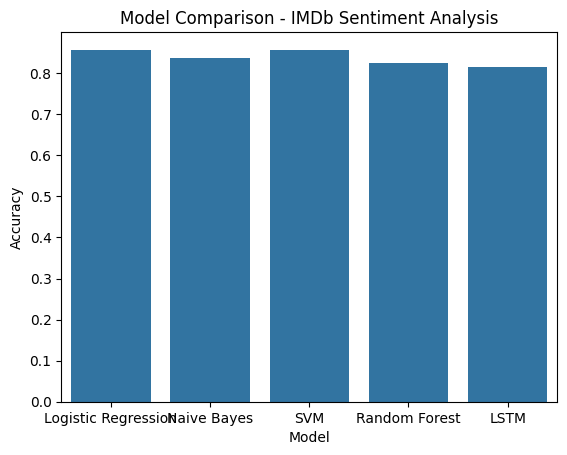

In [29]:
model_scores = pd.DataFrame({
 'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'LSTM'],
 'Accuracy': [acc_lr, acc_nb, acc_svm, acc_rf, acc_lstm]
})
display(model_scores)
sns.barplot(x='Model', y='Accuracy', data=model_scores)
plt.title('Model Comparison - IMDb Sentiment Analysis')
plt.show()

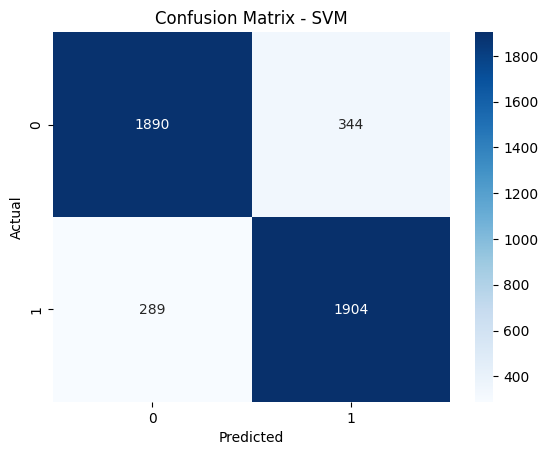

In [30]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 Model Evaluation ● Evaluate the model’s performance using appropriate metrics.

In [32]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, roc_curve, auc,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
# Predictions already done in previous section
# y_pred_svm = svm.predict(X_test)
# Compute metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
print("🔹 Model Evaluation Metrics (SVM)")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

🔹 Model Evaluation Metrics (SVM)
Accuracy : 0.8570
Precision : 0.8470
Recall : 0.8682
F1-score : 0.8575


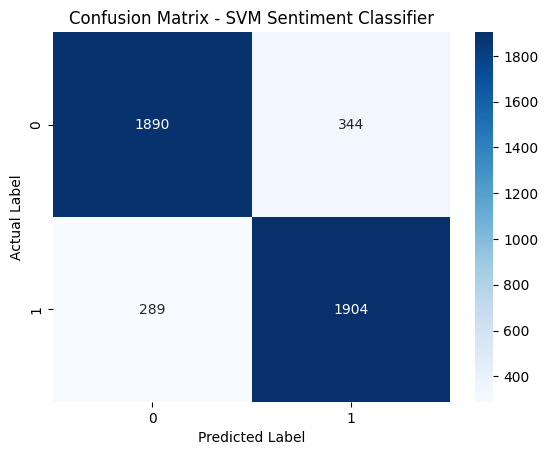


Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.85      0.86      2234
    Positive       0.85      0.87      0.86      2193

    accuracy                           0.86      4427
   macro avg       0.86      0.86      0.86      4427
weighted avg       0.86      0.86      0.86      4427



In [33]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM Sentiment Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
print("\nClassification Report:\n", classification_report(y_test,
y_pred_svm, target_names=['Negative', 'Positive']))


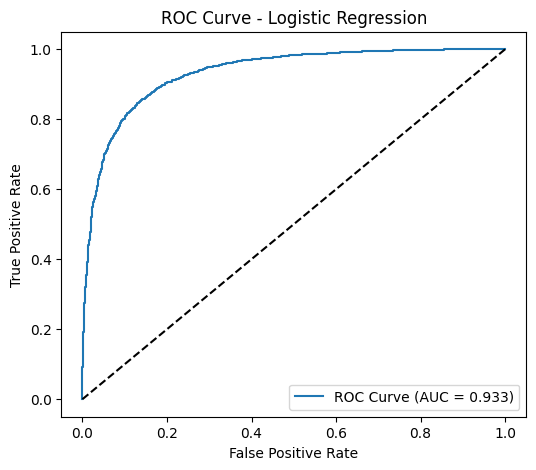

In [34]:
# For Logistic Regression example
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

,Model,Accuracy
0,Logistic Regression,0.856110
1,Naive Bayes,0.837362
2,SVM,0.857014
3,Random Forest,0.825841
4,LSTM,0.814999


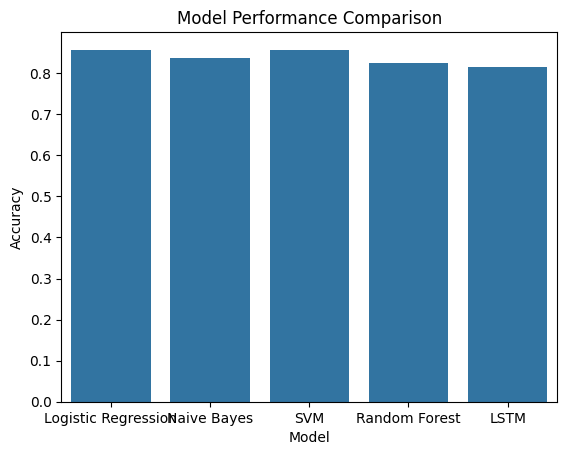

In [36]:
model_scores = pd.DataFrame({
 'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'LSTM'],
 'Accuracy': [acc_lr, acc_nb, acc_svm, acc_rf, acc_lstm]
})
display(model_scores)
sns.barplot(x='Model', y='Accuracy', data=model_scores)
plt.title('Model Performance Comparison')
plt.show()